#### **This notebook visualize the cosine similarity**

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from tqdm import tqdm
import sys
import os
import re

import importlib

#### packages
import helper.strategy_helper as st_hp
import helper.visualization as vz_hp
import config.config as config_hp

#### **Load the cosine file**

In [2]:
config = config_hp.config()

pos_cosine_path = config['EMBEDDINGS_PATH']['pos_cosine_with_replier_info']

neg_cosine_path = config['EMBEDDINGS_PATH']['neg_cosine_with_replier_info']

In [3]:
df_pos_cosine = pd.read_pickle(pos_cosine_path)

In [4]:
df_pos_cosine.columns

Index(['poster_tweetid', 'cosine', 'tweet_label', 'replier_tweetid_x',
       'replier_userid_x', 'replier_label_x', 'replier_tweetid_y',
       'replier_userid_y', 'replier_label_y'],
      dtype='object')

In [5]:
df_pos_cosine_0 = df_pos_cosine.loc[(df_pos_cosine['replier_label_x'] == 0) & (df_pos_cosine['replier_label_y'] == 0)]

In [6]:
df_pos_cosine_1 = df_pos_cosine.loc[(df_pos_cosine['replier_label_x'] == 1) & (df_pos_cosine['replier_label_y'] == 1)]

In [5]:
# print('cosine mean IO', df_pos_cosine_1['cosine'].mean())
# print('cosine median IO', df_pos_cosine_0['cosine'].median())

In [6]:
# df_neg_cosine = pd.read_pickle(neg_cosine_path)

In [7]:
import gc

del df_pos_cosine
gc.collect()

0

In [7]:
df_pos_cosine['poster_tweetid'].nunique()

3866

In [ ]:
# df_neg_cosine['poster_tweetid'].nunique()

In [ ]:
7670/2

In [ ]:
# df_neg_cosine['cosine'].head()

In [ ]:
# df_cosine_1 = df_cosine.loc[df_cosine['tweet_label'] == 1]

In [ ]:
# df_cosine_1['poster_tweetid'].nunique()

#### **Cosine between IO repliers**

In [11]:
# print('Pos ', df_pos_cosine['cosine'].mean())
# print('Neg ', df_neg_cosine['cosine'].mean())

Pos  0.39966017
Neg  0.40479538


In [13]:
df_pos_cosine_1 = df_pos_cosine.loc[(df_pos_cosine['replier_label_x'] == 1) & (df_pos_cosine['replier_label_y'] == 1)]

In [14]:
df_pos_cosine_0 = df_pos_cosine.loc[(df_pos_cosine['replier_label_x'] == 0) & (df_pos_cosine['replier_label_y'] == 0)]

In [10]:
print('cosine IO', df_pos_cosine_1['cosine'].median())
print('cosine Normal', df_pos_cosine_0['cosine'].median())

cosine IO 0.46
cosine Normal 0.33


In [ ]:
# df_pos_cosine_01 = df_pos_cosine.loc[(df_pos_cosine['replier_label_x'] == 0) & (df_pos_cosine['replier_label_y'] == 1)]

#### **Plot IO vs Normal**

In [9]:
def plot_single_histogram(parameters):
    '''
    Plots histogram
    :param parameters: parameters for the plot
    '''
       
    # parameters =  {
    #     'data': df,
    #     'fontsize': 14,
    #     'columns': [
    #         {'column': 'count',
    #          'label': 'Count of Replies',
    #         }
    #     ],
    #     'xlabel': '',
    #     'ylabel': '',
    #     'legend_location': '',
    #     'log_yscale': True,
    #     'log_xscale': True,
    #     'bins': 60,
    #     'save': {
    #         'path': '',
    #         'filename': ''
    #     },
    #     'title': ''
    # }
    
    import numpy as np
    
    num_bins = parameters['bins']
    column = parameters['columns'][0]['column']
    # df = parameters['data']
    
    if 'fontsize' in parameters:
        fontsize = parameters['fontsize']
    else:
        fontsize = 14
    
    if parameters['bins'] == None:
        num_bins = df[column].nunique()
        
    if parameters['log_xscale'] == True:
        num_bins=np.logspace(start=np.log10(min(df[column])), 
                             stop=np.log10(max(df[column])),
                             num=num_bins
                            )
    fig, ax = plt.subplots(figsize=(10,10))

    colors = ['red', 'blue', 'green', 
              'orange', 'olive', 'pink', 'lime',
              'maroon'
             ]
    for i, df in enumerate(parameters['data']):
        counts, bin_edges, patches  = ax.hist(df[column],
                    bins=num_bins, 
                    color=colors[i],
                    alpha=0.5,
                    density=True,
                    label=parameters['columns'][i]['label']
                   )
        max_density = np.max(counts)
        
        print(max_density)

    y_min, y_max = ax.get_ylim()
    
    # Print the y-axis range
    print(f"Y-axis range: min={y_min}, max={y_max}")

    ax.set_xlabel(parameters['xlabel'],
                  fontsize=fontsize
                 )
    ax.set_ylabel(parameters['ylabel'],
                  fontsize=fontsize
                 )
    if 'tick_size' in parameters:
        tick_size = parameters['tick_size']
    else:
        tick_size = fontsize
        
    ax.tick_params(axis='both', 
                   which='both', 
                   labelsize=tick_size,
                   labelbottom=True
                  )

    if 'legend_location' in parameters:
        if 'legend_font' in parameters:
            legend_font = parameters['legend_font']
        else:
            legend_font = fontsize
            
        ax.legend(loc=parameters['legend_location'], 
                  frameon=True, 
                  fontsize=legend_font
             )
    
    if parameters['log_yscale'] == True:
        plt.yscale('log')
    if parameters['log_xscale'] == True:
        plt.xscale('log')
        
    plt.title(parameters['title'],
              fontsize=fontsize
             )
    fig.tight_layout()
    
    if 'save' in parameters:
        plot_path = parameters['save']['path']
        title = parameters['save']['filename']

        path = os.path.join(plot_path, title)
        fig.savefig(f'{path}', 
                  facecolor='white', 
                  transparent=False)
    plt.show()

2.612842787866031
1.7889725292480805
Y-axis range: min=0.0, max=2.743484927259333


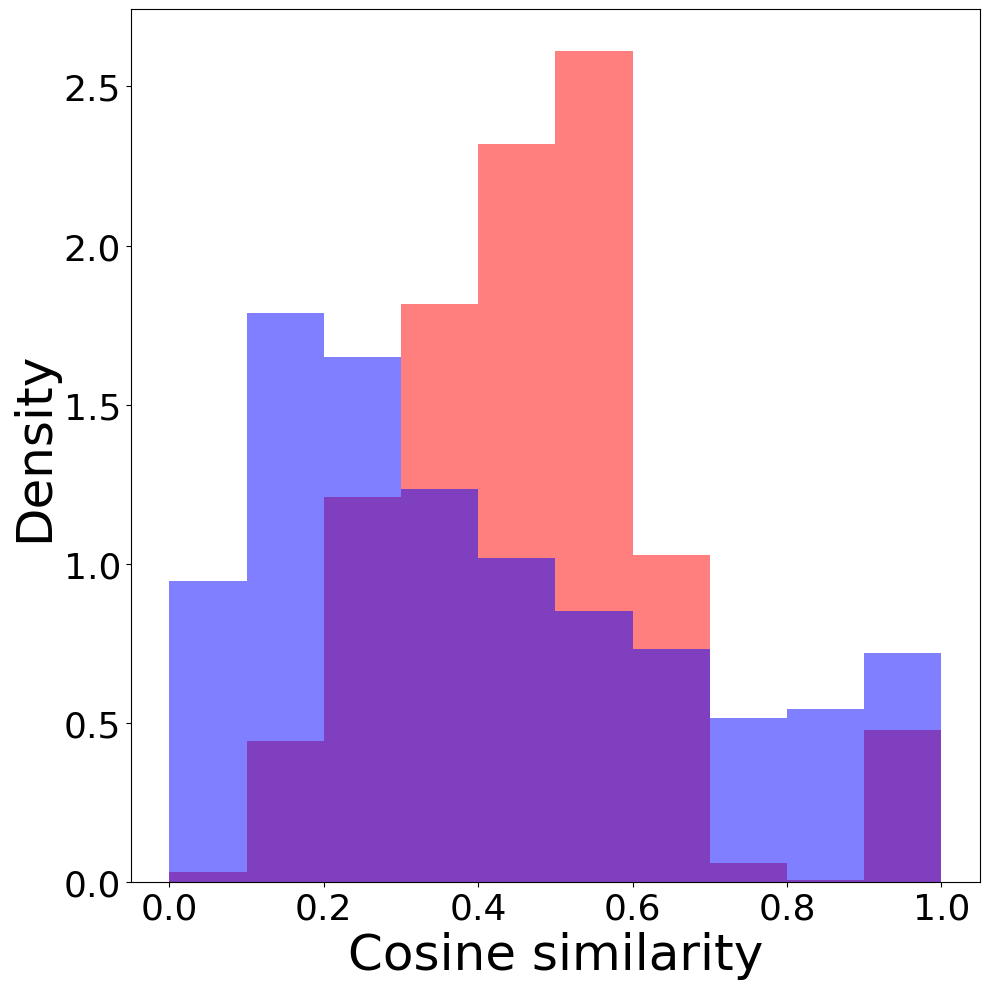

In [13]:
bins = list(np.arange(0, 1.01, 0.1))
parameters =  {
        'data': [df_pos_cosine_1,df_pos_cosine_0] ,
        'fontsize': 36,
        'legend_font': 24,
        'columns': [
            {'column': 'cosine',
             'label': 'IO repliers',
            },
            {'column': 'cosine',
             'label': 'Normal repliers',
            }
           ],
        'tick_size': 26,
        'xlabel': 'Cosine similarity',
        'ylabel': 'Density',
        # 'legend_location': 'upper left',
        'log_yscale': False,
        'log_xscale': False,
        'bins': bins,
        # 'save': {
        #     'path': './plots',
        #     'filename': 'kde_sample_histogram_io_normal_replier.png'
        # },
        'title': ''
    }

plot_single_histogram(parameters)

#### **Sample plot**

In [14]:
config = config_hp.config()
stat = config['USER_FEATURES']

all_feature = stat['all_feature']

df_stat = pd.read_pickle(all_feature)

In [15]:
df_0 = df_stat.loc[df_stat['replier_label'] == 0]
df_1 = df_stat.loc[df_stat['replier_label'] == 1]

In [16]:
import gc

del df_stat
gc.collect()

4144

In [17]:
all_df = [df_pos_cosine_0]
for i in range(0,10):
    df_sample = df_0.sample(len(df_1), random_state=i)
    
    df_0 = df_0.loc[~df_0['replier_userid'].isin(
        df_sample['replier_userid']
    )]
    
    df_all = pd.concat([df_sample,
                        df_1
                       ])

    df_sample_cosine = df_pos_cosine_0.loc[
        df_pos_cosine_0['replier_userid_x'].isin(
            df_all['replier_userid']
        ) | df_pos_cosine_0['replier_userid_y'].isin(
            df_all['replier_userid']
        )
    ]
    all_df.append(df_sample_cosine)
    
    del df_all
    del df_sample

    gc.collect()

IOStream.flush timed out


#### **Histogram**

In [18]:
def plot_histogram(parameters):
    '''
    Plots histogram
    :param parameters: parameters for the plot
    '''
       
    # parameters =  {
    #     'data': df,
    #     'fontsize': 14,
    #     'columns': [
    #         {'column': 'count',
    #          'label': 'Count of Replies',
    #         }
    #     ],
    #     'xlabel': '',
    #     'ylabel': '',
    #     'legend_location': '',
    #     'log_yscale': True,
    #     'log_xscale': True,
    #     'bins': 60,
    #     'save': {
    #         'path': '',
    #         'filename': ''
    #     },
    #     'title': ''
    # }
    
    
    num_bins = parameters['bins']
    column = parameters['columns'][0]['column']
    # df = parameters['data']
    
    if 'fontsize' in parameters:
        fontsize = parameters['fontsize']
    else:
        fontsize = 14
    
    if parameters['bins'] == None:
        num_bins = df[column].nunique()
        
    if parameters['log_xscale'] == True:
        num_bins=np.logspace(start=np.log10(min(df[column])), 
                             stop=np.log10(max(df[column])),
                             num=num_bins
                            )
    fig, ax = plt.subplots(figsize=(10,10))

    colors = ['red', 'blue', 'green', 
              'orange', 'olive', 'pink', 'lime',
              'maroon'
             ]
    colors = ['blue', 
              'pink', 
              'pink', 
              'pink', 
              'pink', 
              'pink', 
              'pink', 
              'pink', 
              'pink'
              'pink', 
              'pink',
              'pink'
             ]
    for i, df in enumerate(parameters['data']):
        if i == 0:
            color = 'blue'
            alpha = 0.5
            histtype='bar'
            linewidth =4
        else:
            color = None
            alpha = 0.5
            histtype='step'
            linewidth=2
            style = {'facecolor': 'none', 'edgecolor': 'C0', 'linewidth': 3}
            
        n = ax.hist(df[column],
                    bins=num_bins, 
                    color=color,
                    alpha=alpha,
                    density=True,
                    histtype=histtype,
                    linewidth=linewidth
                    # label=parameters['columns'][i]['label']
                   )
        # n = ax.plot(df[column],
        #             # bins=num_bins, 
        #             color=color,
        #             alpha=0.3,
        #             # density=True,
        #             label=parameters['columns'][i]['label']
        #            )

    ax.set_ylim(0, 2.74)
    ax.set_xlabel(parameters['xlabel'],
                  fontsize=fontsize
                 )
    ax.set_ylabel(parameters['ylabel'],
                  fontsize=fontsize
                 )
    if 'tick_size' in parameters:
        tick_size = parameters['tick_size']
    else:
        tick_size = fontsize
        
        
    ax.tick_params(axis='both', 
                   which='both', 
                   labelsize=tick_size,
                   labelbottom=True
                  )

    if 'legend_location' in parameters:
        if 'legend_font' in parameters:
            legend_font = parameters['legend_font']
        else:
            legend_font = fontsize
            
        ax.legend(loc=parameters['legend_location'], 
                  frameon=True, 
                  fontsize=legend_font
             )
    
    if parameters['log_yscale'] == True:
        plt.yscale('log')
    if parameters['log_xscale'] == True:
        plt.xscale('log')
        
    plt.title(parameters['title'],
              fontsize=fontsize
             )
    fig.tight_layout()
    
    if 'save' in parameters:
        plot_path = parameters['save']['path']
        title = parameters['save']['filename']

        path = os.path.join(plot_path, title)
        fig.savefig(f'{path}', 
                  facecolor='white', 
                  transparent=False)
    plt.show()

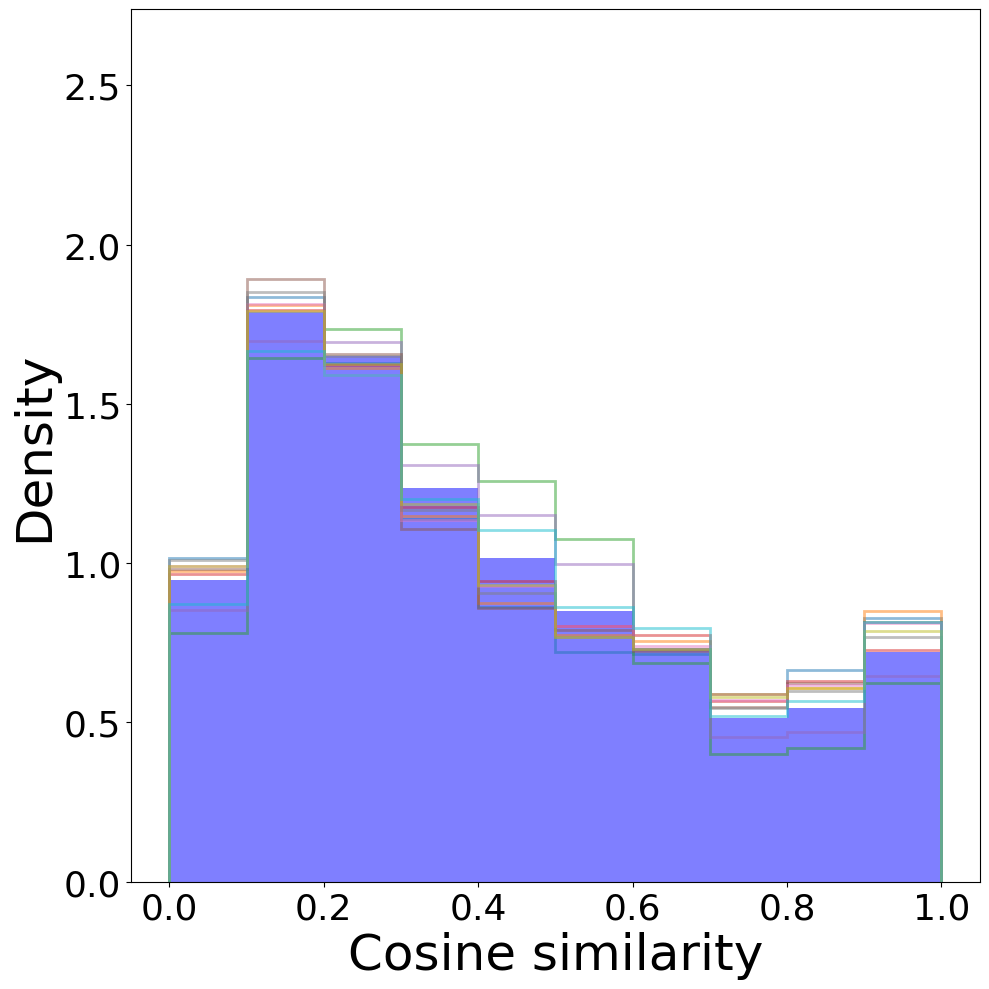

In [19]:
import helper.visualization as vz_hp

bins = list(np.arange(0, 1.01, 0.1))

columns = []
columns= [{'column': 'cosine',
             'label': 'Normal repliers',
            }]
for i in range(1, 11):
    columns.append(
        {'column': 'cosine',
         'label': f'Sample {i}',
        }
    )
                   
parameters =  {
        'data': all_df, #[df_pos_cosine_1,df_pos_cosine_0] ,
        'fontsize': 36,
        'legend_font': 24,
        'columns':columns,
        'tick_size': 26,
        'xlabel': 'Cosine similarity',
        'ylabel': 'Density',
        # 'legend_location': 'upper left',
        'log_yscale': False,
        'log_xscale': False,
        'bins': bins,
        'save': {
            'path': './plots',
            'filename': 'kde_sample_histogram_io_normal_replier.png'
        },
        'title': ''
    }

plot_histogram(parameters)

#### **KDE**

In [ ]:
len(df_pos_cosine_01)

In [ ]:
parameters =   {
        'data': [df_pos_cosine_1, 
                 df_pos_cosine_0, 
                 # df_pos_cosine_01
                ],
        'fontsize': 14,
        'complementary': True,
        'columns': [
            {'column': 'cosine',
             'label': 'IO replier',
            },
            {
            'column': 'cosine',
             'label': 'Normal replier'
            },
            {
            'column': 'cosine',
             'label': 'IO-Normal replier'
            }
        ],
        'xlabel': 'Cosine',
        'ylabel': 'Density',
        'legend_location': 'upper right',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': './plots',
            'filename': 'exp_tweets_IO_normal_cosine.png'
        },
        'random_color': False
    }

vz_hp.kde(parameters)

#### **KDE for targeted tweets**

In [ ]:
parameters =   {
        'data': [df_pos_cosine, df_neg_cosine],
        'fontsize': 14,
        'complementary': True,
        'columns': [
            {'column': 'cosine',
             'label': 'IO',
            },
            {
            'column': 'cosine',
             'label': 'Control'
            }
        ],
        'xlabel': '',
        'ylabel': '',
        'legend_location': 'upper right',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': './plots',
            'filename': 'IO_control_cosine.png'
        },
        'random_color': False
    }

vz_hp.kde(parameters)

In [ ]:
# df_cosine_1.head()

In [ ]:
### Check if cosine similarity is < 0